# Load Testing Analysis

## Jonathan Camenzuli

Source code is part of my Final Year Project in Computer Engineering (2022/23) entitled "Miniature implementation of an IoT-based Smart City"

In [8]:
# Libaries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
mpl.rcParams['font.family'] = 'Lato'
mpl.rcParams['font.sans-serif'] = 'Lato'

In [10]:
# Read the CSV file into a DataFrame
df = pd.read_csv('resource_data.csv')

# Convert the 'Timestamp' column to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

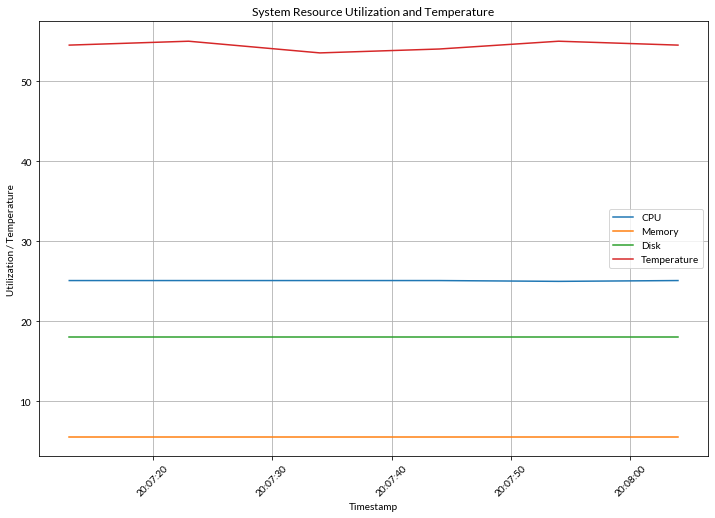

In [11]:
# Plot CPU, memory, disk, and temperature data
plt.figure(figsize=(12, 8))
plt.plot(df['Timestamp'], df['CPU (%)'], label='CPU')
plt.plot(df['Timestamp'], df['Memory (%)'], label='Memory')
plt.plot(df['Timestamp'], df['Disk (%)'], label='Disk')
plt.plot(df['Timestamp'], df['Temperature (C)'], label='Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Utilization / Temperature')
plt.title('System Resource Utilization and Temperature')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.show()